     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
113           5.7          2.5           5.0          2.0
90            5.5          2.6           4.4          1.2
12            4.8          3.0           1.4          0.1
106           4.9          2.5           4.5          1.7
97            6.2          2.9           4.3          1.3
45            4.8          3.0           1.4          0.3
108           6.7          2.5           5.8          1.8
72            6.3          2.5           4.9          1.5
95            5.7          3.0           4.2          1.2
81            5.5          2.4           3.7          1.0
The accuracy score of K-Mean:  0.09333333333333334


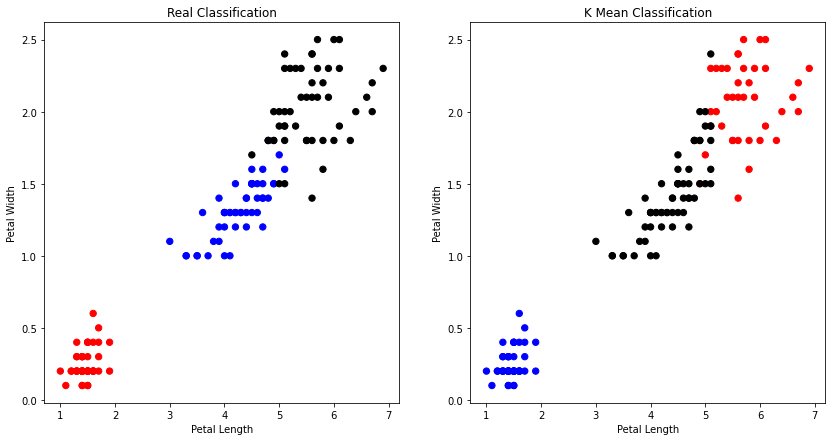

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
from sklearn import preprocessing

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
print(X.sample(10))
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)


plt.figure(figsize=(14,7))

colormap = np.array(['red', 'blue', 'black','magenta'])

plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
122      2.249683    -0.592373      1.672157     1.053935
67      -0.052506    -0.822570      0.194384    -0.262387
12      -1.264185    -0.131979     -1.340227    -1.447076
69      -0.294842    -1.282963      0.080709    -0.130755
88      -0.294842    -0.131979      0.194384     0.132510
105      2.128516    -0.131979      1.615320     1.185567
84      -0.537178    -0.131979      0.421734     0.395774
9       -1.143017     0.098217     -1.283389    -1.447076
117      2.249683     1.709595      1.672157     1.317199
33      -0.416010     2.630382     -1.340227    -1.315444
The accuracy score of EM:  0.36666666666666664


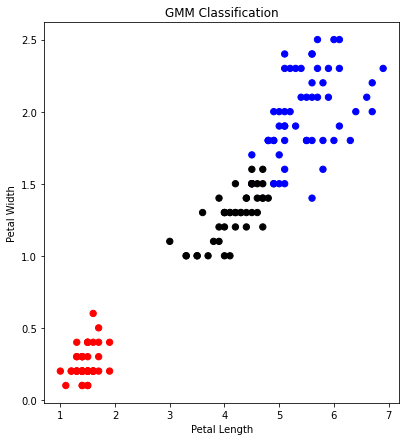

In [3]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
print(xs.sample(10))
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)

plt.figure(figsize=(14,7))
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))